<a href="https://colab.research.google.com/github/lazy-wolf/TME_6015/blob/main/A2_Kaggle_Dataset_and_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 28-10-2023
```

**Delivarable_1 : Create your own separate python notebooks in Colab for each of the three sources.**

**Creating separate python notebooks in Colab for using pre-trained models and dataset from Kaggle**

**Import Libraries**

In [ ]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Kaggle Dataset Info**

[mango leaf disease dataset link](https://huggingface.co/datasets/beans)

*https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset/data*

**Importing Dataset from Kaggle Datasets from Google Drive**

**Data Preprocessing and Data Analysis**

In [ ]:
directory = "/content/drive/MyDrive/TME_6015/Assignment_2/Mango_Leaf_Disease"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names =train_data.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [ ]:
val_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**Showing Examples of Dataset**

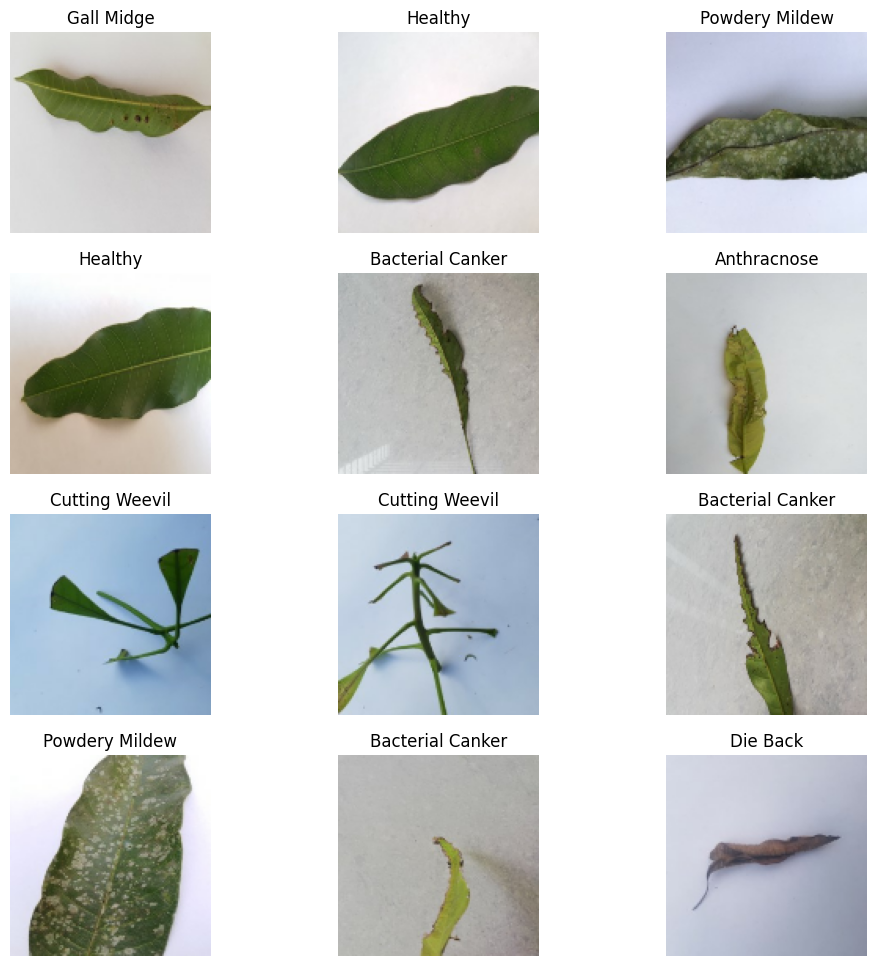

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Kaggle Model-1 Info**

[mobilenet-v2 link](https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2)

*https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2*

**Create a Model-1**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 8
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 8)                 8016      
                                                                 
Total params: 1700505 (6.49 MB)
Trainable params: 1686425 (6.43 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


**Compile and Train the Model-1**

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [ ]:
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:
history_1= model.fit(train_data, epochs=20, validation_data= val_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
100/100 [==============================] - 558s 5s/step - loss: 0.6858 - accuracy: 0.8788 - val_loss: 10.4936 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 92s 915ms/step - loss: 0.3487 - accuracy: 0.9447 - val_loss: 0.7049 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 94s 935ms/step - loss: 0.2007 - accuracy: 0.9709 - val_loss: 0.2688 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 91s 911ms/step - loss: 0.2441 - accuracy: 0.9681 - val_loss: 0.3103 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9781
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 98s 975ms/step - loss: 0.1665 - accuracy: 0.9781 - val_loss: 0.3771 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 6/20
100/100 [==============================

**Evaluate the Model-1**

In [ ]:
loss, accuracy= model.evaluate(val_data)
print(f"loss is: {loss}")
print(f"accuacy is: {accuracy}")

25/25 [==============================] - 6s 218ms/step - loss: 0.0925 - accuracy: 0.9975
loss is: 0.09249758720397949
accuacy is: 0.9975000023841858


In [ ]:
history_mobilenet_v2= pd.DataFrame(history_1.history)
history_mobilenet_v2.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.685793,0.878750,10.493644,0.52750,0.001
1,0.348656,0.944687,0.704878,0.92875,0.001
2,0.200656,0.970937,0.268844,0.96625,0.001
3,0.244055,0.968125,0.310263,0.96750,0.001
4,0.166514,0.978125,0.377149,0.95750,0.001


**Plot Training History**

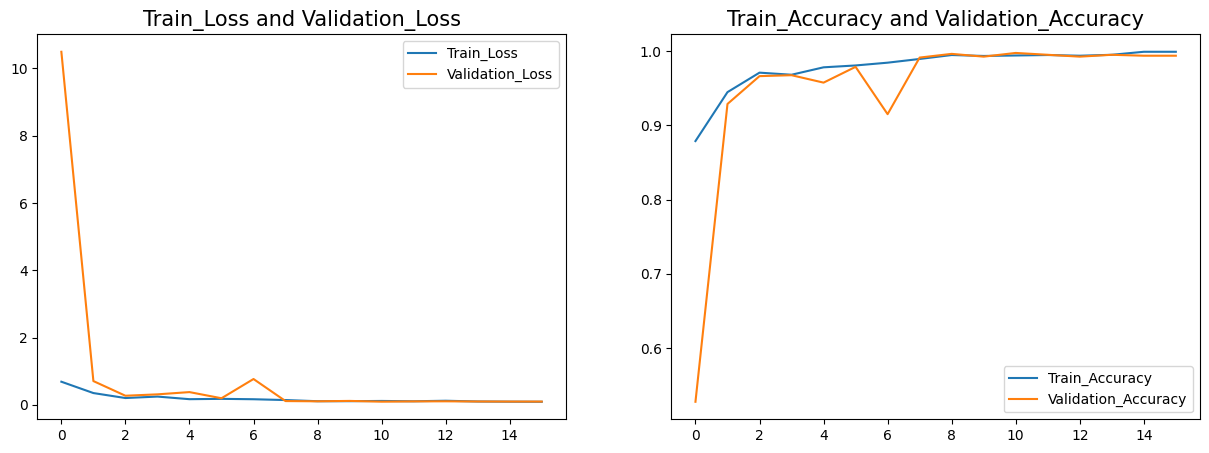

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v2['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v2['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v2['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v2['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model-1 Accuracy**

In [ ]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in val_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

25/25 [==============================] - 5s 160ms/step


**Accuracy Score of Model-1 on Test Dataset**




In [ ]:
model_1_accuracy = accuracy_score(y_test, y_pred)*100
accuracy_score(y_test, y_pred)*100

99.75

**Delivarable_3 : Show a few examples of the predicted output**

**Showing Examples of Predicted Output**

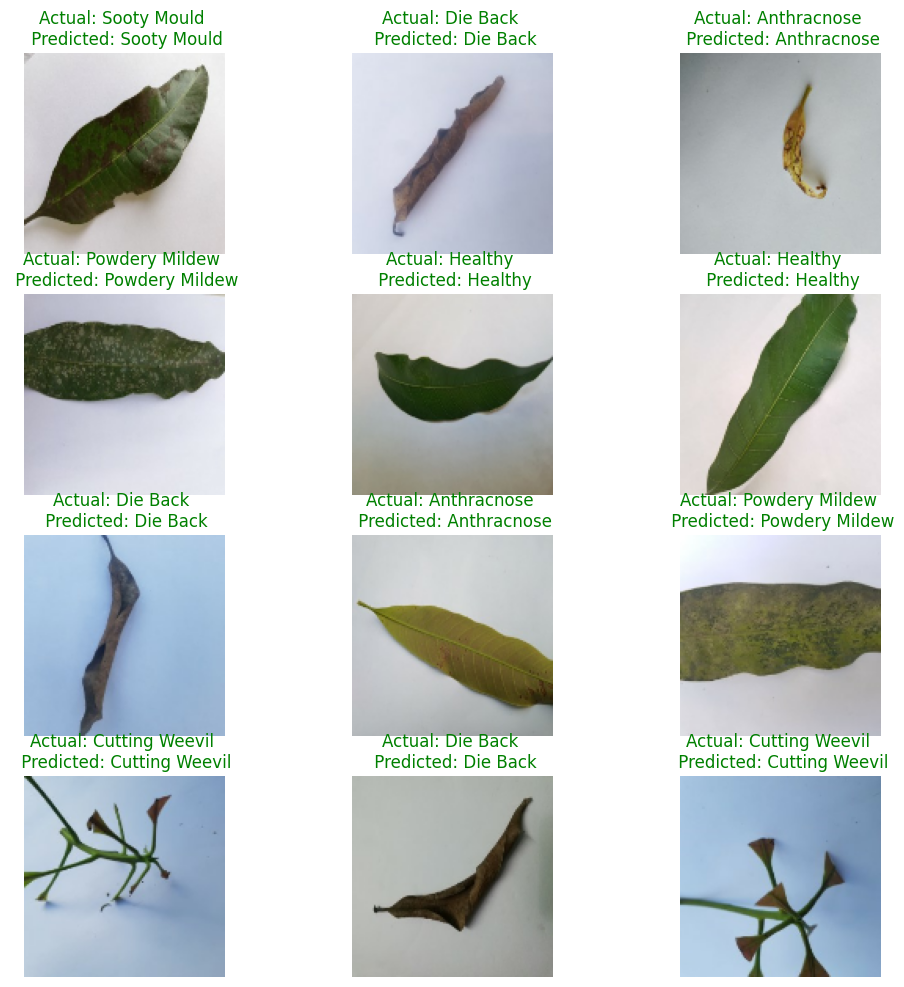

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [ ]:

f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.9974586912130979
Precision:0.9973681294326242
Recall:0.997561553030303


In [ ]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [ ]:
y_test_labels[:5]

['Sooty Mould', 'Die Back', 'Anthracnose', 'Powdery Mildew', 'Healthy']

In [ ]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [ ]:
y_pred_labels[:5]

['Sooty Mould', 'Die Back', 'Anthracnose', 'Powdery Mildew', 'Healthy']

**Classification Report**


In [ ]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00       104
Bacterial Canker       1.00      1.00      1.00        94
  Cutting Weevil       1.00      1.00      1.00        95
        Die Back       1.00      1.00      1.00        97
      Gall Midge       1.00      0.99      0.99        94
         Healthy       1.00      1.00      1.00       111
  Powdery Mildew       0.99      1.00      1.00       109
     Sooty Mould       0.99      0.99      0.99        96

        accuracy                           1.00       800
       macro avg       1.00      1.00      1.00       800
    weighted avg       1.00      1.00      1.00       800



**Delivarable_2 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


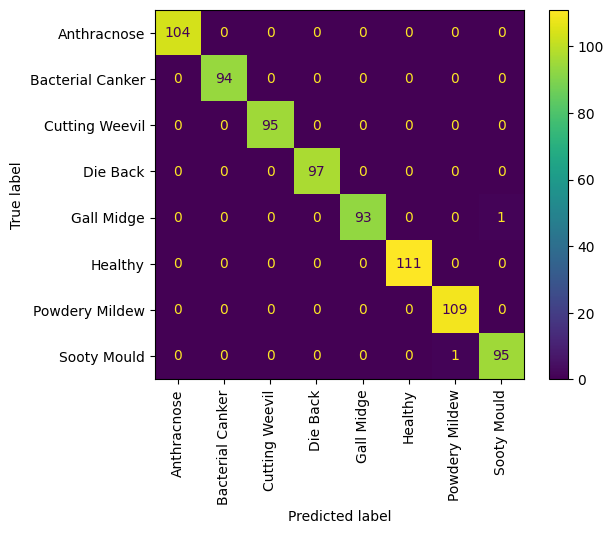

In [ ]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

**Deliverable_4 : Choose one of the above examples (i.e. Tensorflow or Huggingface or Kaggle) and implement a 2 different models on the same test set**

**Model - 2**

**Data Preprocessing and Data Analysis**

In [ ]:
directory = "/content/drive/MyDrive/TME_6015/Assignment_2/Mango_Leaf_Disease"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names =train_data.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [ ]:
val_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**Showing Examples of Dataset**

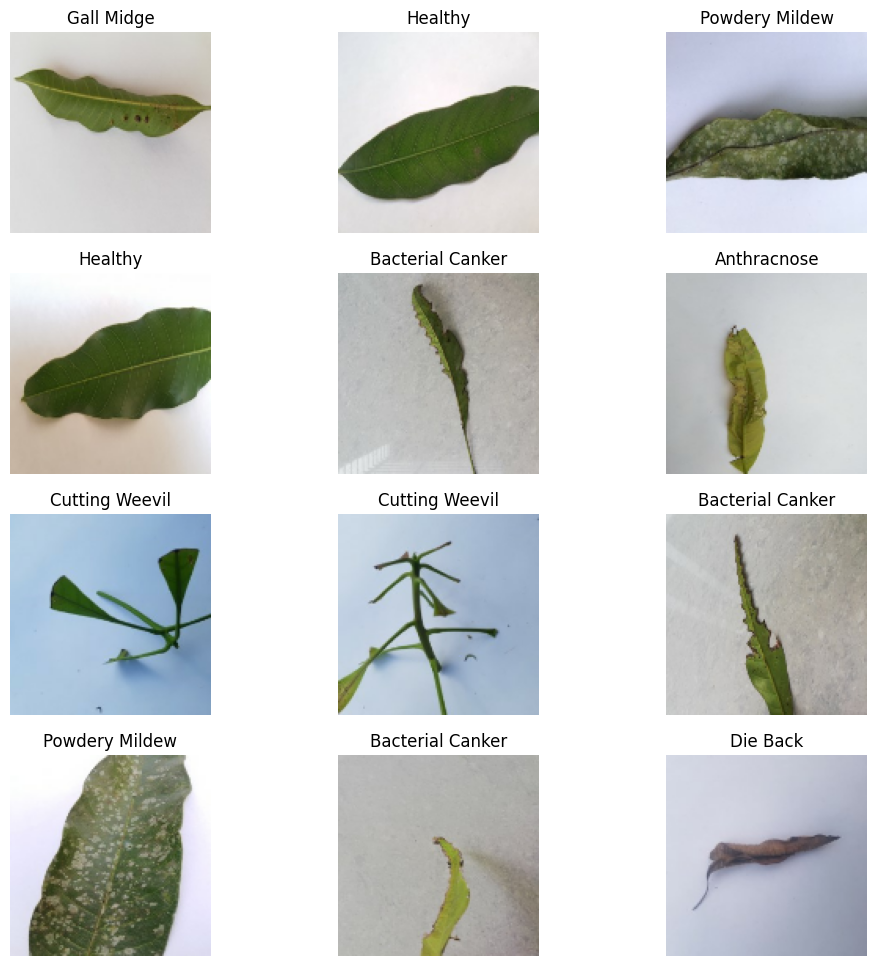

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Kaggle Model-2 Info**

[mobilenet-v1 link](https://www.kaggle.com/models/google/mobilenet-v1/frameworks/TensorFlow2/variations/025-128-classification/versions/2)

*https://www.kaggle.com/models/google/mobilenet-v1/frameworks/TensorFlow2/variations/025-128-classification/versions/2*

**Create a Model-2**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v1/frameworks/TensorFlow2/variations/025-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 8
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1001)              475801    
                                                                 
 dense_1 (Dense)             (None, 8)                 8016      
                                                                 
Total params: 483817 (1.85 MB)
Trainable params: 478345 (1.82 MB)
Non-trainable params: 5472 (21.38 KB)
_________________________________________________________________


**Compile and Train the Model-2**

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [ ]:
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:
history_2= model.fit(train_data, epochs=20, validation_data= val_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
100/100 [==============================] - 57s 473ms/step - loss: 0.6020 - accuracy: 0.8988 - val_loss: 3.2793 - val_accuracy: 0.7050 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 49s 490ms/step - loss: 0.2688 - accuracy: 0.9753 - val_loss: 2.8480 - val_accuracy: 0.6975 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 49s 485ms/step - loss: 0.2187 - accuracy: 0.9837 - val_loss: 1.5066 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 49s 490ms/step - loss: 0.2907 - accuracy: 0.9725 - val_loss: 0.2007 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 50s 492ms/step - loss: 0.2700 - accuracy: 0.9812 - val_loss: 0.6508 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.9816
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [=============================

**Evaluate the Model-2**

In [ ]:
loss, accuracy= model.evaluate(val_data)
print(f"loss is: {loss}")
print(f"accuacy is: {accuracy}")

25/25 [==============================] - 3s 99ms/step - loss: 0.1338 - accuracy: 1.0000
loss is: 0.13376165926456451
accuacy is: 1.0


In [ ]:
history_mobilenet_v1= pd.DataFrame(history_2.history)
history_mobilenet_v1.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.602002,0.898750,3.279288,0.70500,0.001
1,0.268836,0.975312,2.848010,0.69750,0.001
2,0.218734,0.983750,1.506602,0.85750,0.001
3,0.290703,0.972500,0.200669,0.98500,0.001
4,0.269997,0.981250,0.650807,0.92875,0.001


**Plot Training History**

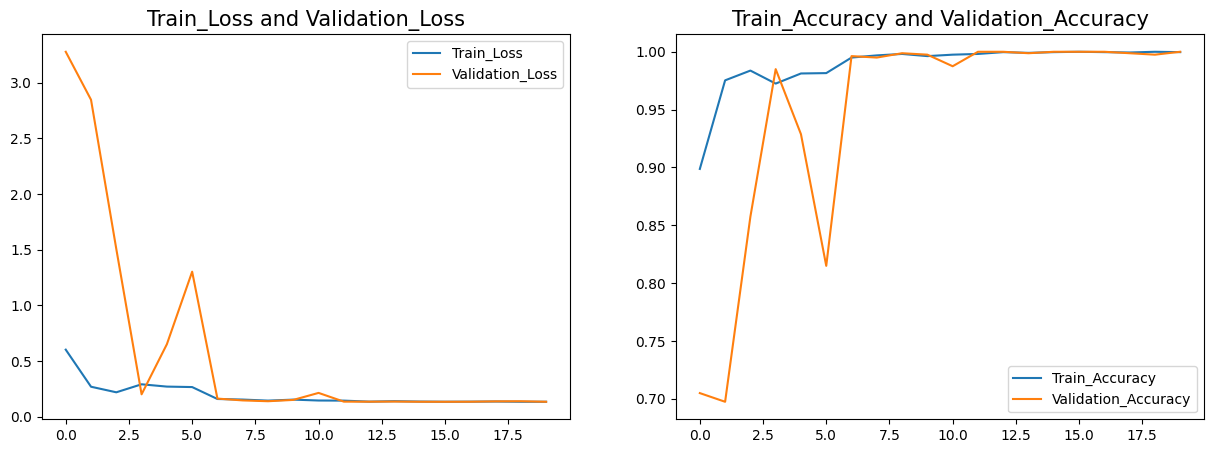

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v1['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v1['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v1['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v1['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model-2 Accuracy**

In [ ]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in val_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

25/25 [==============================] - 2s 77ms/step


**Accuracy Score of Model-2 on Test Dataset**

In [ ]:
model_2_accuracy = accuracy_score(y_test, y_pred)*100
accuracy_score(y_test, y_pred)*100

100.0

**Delivarable_3 : Show a few examples of the predicted output**

**Showing Examples of Predicted Output**

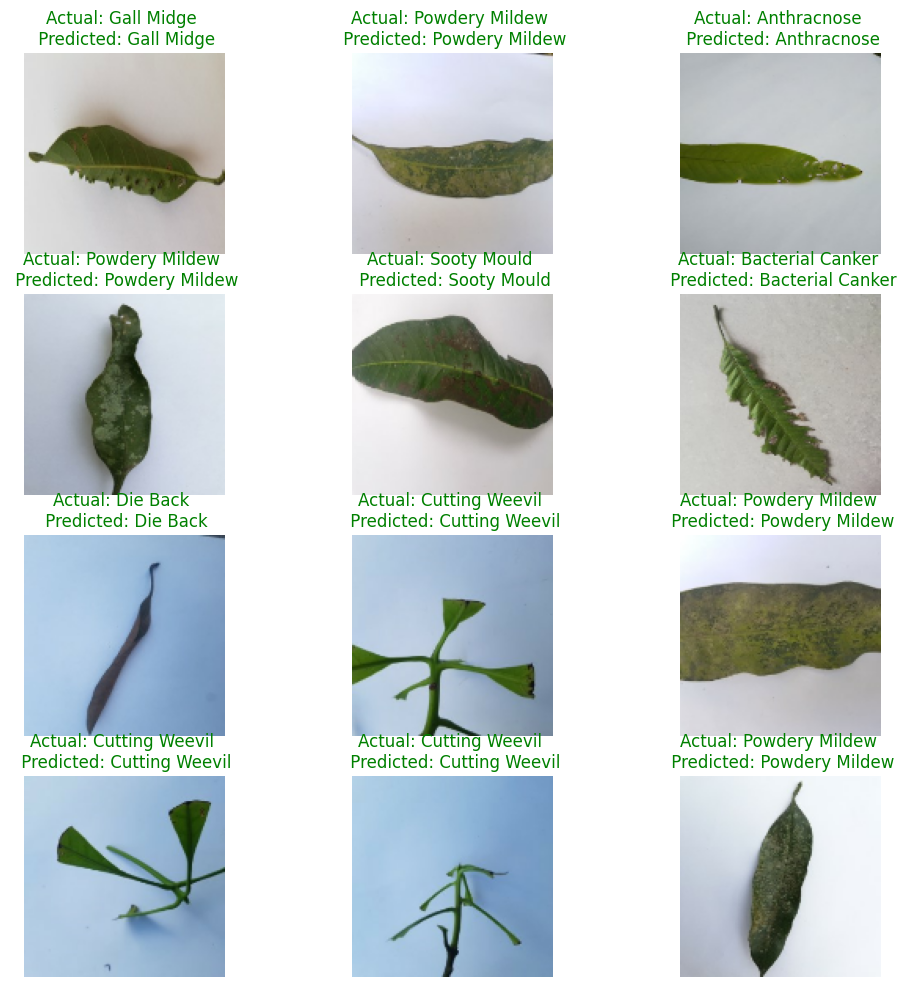

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [ ]:

f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:1.0
Precision:1.0
Recall:1.0


In [ ]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [ ]:
y_test_labels[:5]

['Gall Midge',
 'Powdery Mildew',
 'Anthracnose',
 'Powdery Mildew',
 'Sooty Mould']

In [ ]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [ ]:
y_pred_labels[:5]

['Gall Midge',
 'Powdery Mildew',
 'Anthracnose',
 'Powdery Mildew',
 'Sooty Mould']

**Classification Report**

In [ ]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00       104
Bacterial Canker       1.00      1.00      1.00        94
  Cutting Weevil       1.00      1.00      1.00        95
        Die Back       1.00      1.00      1.00        97
      Gall Midge       1.00      1.00      1.00        94
         Healthy       1.00      1.00      1.00       111
  Powdery Mildew       1.00      1.00      1.00       109
     Sooty Mould       1.00      1.00      1.00        96

        accuracy                           1.00       800
       macro avg       1.00      1.00      1.00       800
    weighted avg       1.00      1.00      1.00       800



**Delivarable_2 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


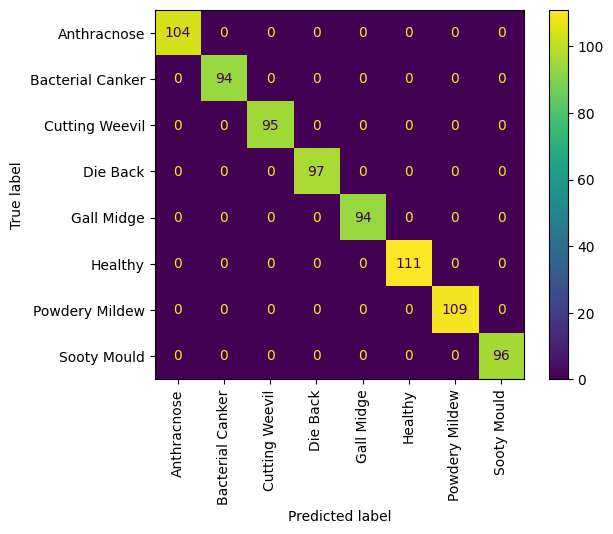

In [ ]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

**Deliverable_5 : Compare the results between the models**

**Comparing Results between two Models - MobileNet V1 vs V2**

In [ ]:
print(f"Model - 1 : Mobile V2 Accuracy score : {model_1_accuracy}")
print(f"Model - 2 : Mobile V1 Accuracy score : {model_2_accuracy}")

Model - 1 : Mobile V2 Accuracy score : 99.75
Model - 2 : Mobile V1 Accuracy score : 100.0
